In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import random
import numpy as np
import time 

In [6]:
data = pd.read_csv('worldcities.csv')
data.head()

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,Tokyo,Tokyo,35.6897,139.6922,Japan,JP,JPN,Tōkyō,primary,37977000.0,1392685764
1,Jakarta,Jakarta,-6.2146,106.8451,Indonesia,ID,IDN,Jakarta,primary,34540000.0,1360771077
2,Delhi,Delhi,28.6600,77.2300,India,IN,IND,Delhi,admin,29617000.0,1356872604
3,Mumbai,Mumbai,18.9667,72.8333,India,IN,IND,Mahārāshtra,admin,23355000.0,1356226629
4,Manila,Manila,14.6000,120.9833,Philippines,PH,PHL,Manila,primary,23088000.0,1608618140


In [7]:
# haversine function (reference: https://stackoverflow.com/questions/4913349/haversine-formula-in-python-bearing-and-distance-between-two-gps-points)
from math import radians, cos, sin, asin, sqrt

def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance in kilometers between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371 # Radius of earth in kilometers. Use 3956 for miles. Determines return value units.
    return c * r

In [1]:
def time_it(function, *args, n=3):
    times = []
    for i in range(n):
        start = time.perf_counter()
        function(*args)
        times.append(time.perf_counter()-start)
    return min(times)

In [11]:
pts = [np.array(pt) for pt in zip(data['lng'], data['lat'])]

def knn_mapping(k):
    centers = random.sample(pts, k)

    old_cluster_ids, cluster_ids = None, []

    while cluster_ids != old_cluster_ids:
        old_cluster_ids = list(cluster_ids)
        cluster_ids = []
        for pt in pts:
            min_cluster = -1
            min_dist = float('inf')
            for i, center in enumerate(centers):
                dist = haversine(pt[0],pt[1],center[0],center[1])
                if dist < min_dist:
                    min_cluster = i
                    min_dist = dist
            cluster_ids.append(min_cluster)
        data['cluster'] = cluster_ids
        cluster_pts = [[pt for pt, cluster in zip(pts, cluster_ids) if cluster == match]for match in range(k)]
        centers = [sum(pts)/len(pts) for pts in cluster_pts]
        
        plt.figure(figsize=(12,6))
        m = Basemap(projection='robin', lat_0=0, lon_0=-100,resolution='c')
        m.drawmapboundary(fill_color='aqua')
        lons = data['lng'].tolist()
        lats = data['lat'].tolist()
        # convert to map projection coords.
        xpts,ypts = m(lons,lats)

        cluster = data['cluster'].tolist()
        m.scatter(xpts, ypts, c= cluster, cmap='jet', s=0.6, alpha=0.3)
        
        plt.title(f"Distribution of cities when there are {k} clusters", fontsize=18)
        plt.show()

In [24]:
pts = [np.array(pt) for pt in zip(data['lng'], data['lat'])]

def knn_mapping(k,n):
    for i in range(n):
        start = time.perf_counter()
        centers = random.sample(pts, k)
        old_cluster_ids, cluster_ids = None, []

        while cluster_ids != old_cluster_ids:
            old_cluster_ids = list(cluster_ids)
            cluster_ids = []
            for pt in pts:
                min_cluster = -1
                min_dist = float('inf')
                for i, center in enumerate(centers):
                    dist = haversine(pt[0],pt[1],center[0],center[1])
                    if dist < min_dist:
                        min_cluster = i
                        min_dist = dist
                cluster_ids.append(min_cluster)
            data['cluster'] = cluster_ids
            cluster_pts = [[pt for pt, cluster in zip(pts, cluster_ids) if cluster == match]for match in range(k)]
            centers = [sum(pts)/len(pts) for pts in cluster_pts]

        plt.figure(figsize=(12,6))
        m = Basemap(projection='robin', lat_0=0, lon_0=-100,resolution='c')
        m.drawmapboundary(fill_color='aqua')
        lons = data['lng'].tolist()
        lats = data['lat'].tolist()
        # convert to map projection coords.
        xpts,ypts = m(lons,lats)

        cluster = data['cluster'].tolist()
        m.scatter(xpts, ypts, c= cluster, cmap='jet', s=0.6, alpha=0.3)

        plt.title(f"Distribution of cities when there are {k} clusters", fontsize=18)
        plt.show()
        
        runtime = time.perf_counter() - start
        print(f"Runtime when k = {k}: {runtime} sec")

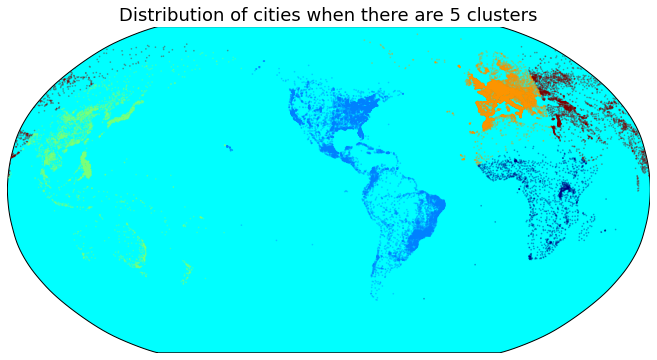

Runtime when k = 5: 6.457292555001914 sec


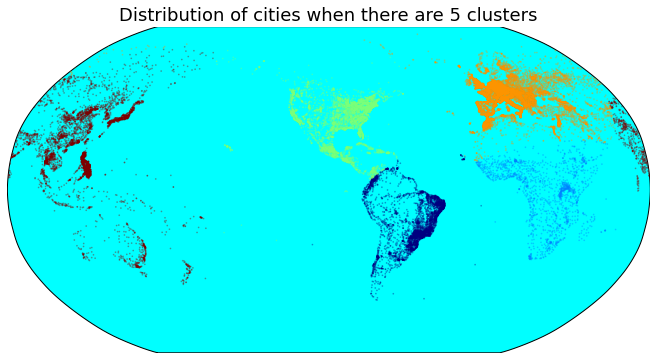

Runtime when k = 5: 13.289781694998965 sec


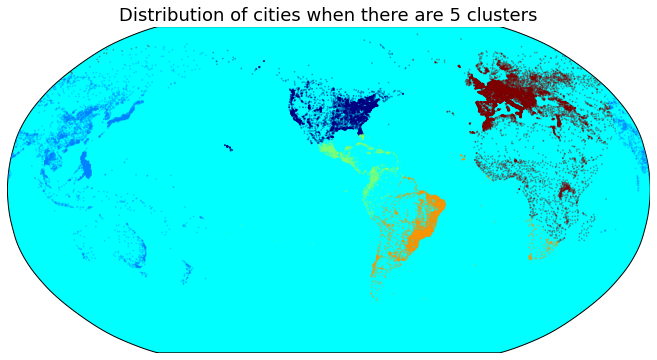

Runtime when k = 5: 3.8622102750086924 sec


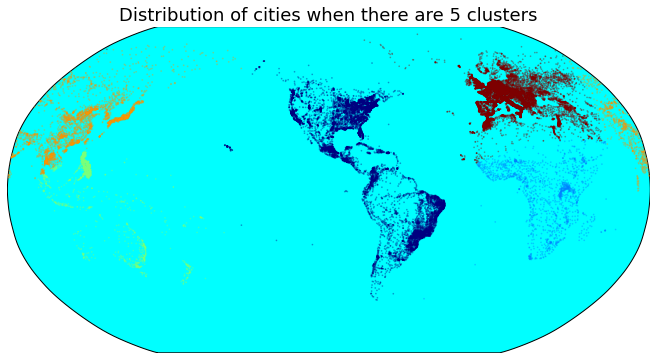

Runtime when k = 5: 5.149982566013932 sec


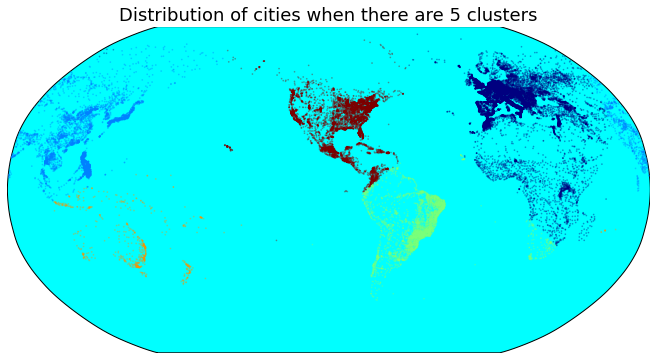

Runtime when k = 5: 6.647395116000553 sec


In [25]:
# k = 5
five_clusters = knn_mapping(5,5)
five_clusters 

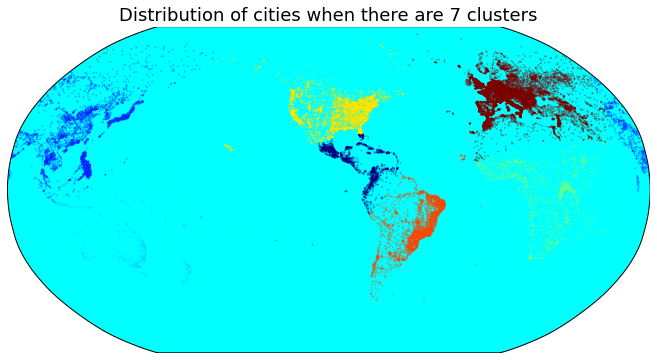

Runtime when k = 7: 8.716295392994653 sec


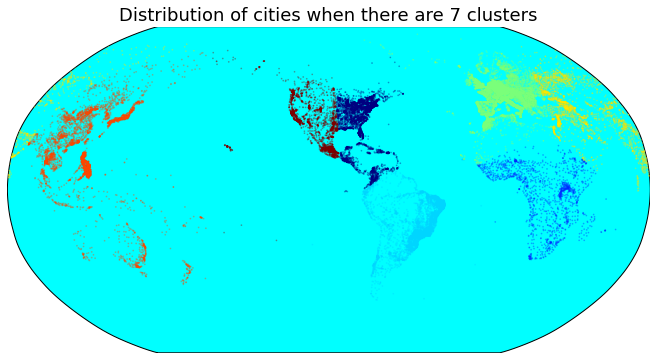

Runtime when k = 7: 17.20939413701126 sec


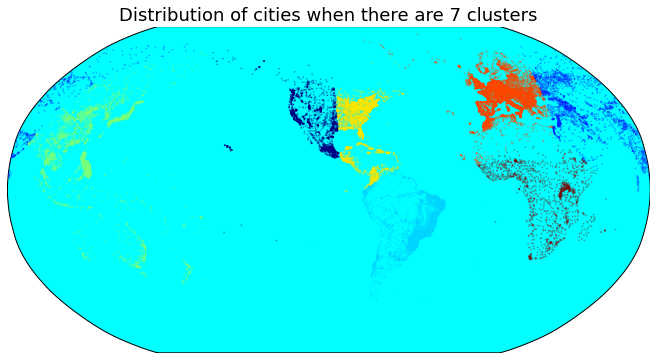

Runtime when k = 7: 15.550632986996789 sec


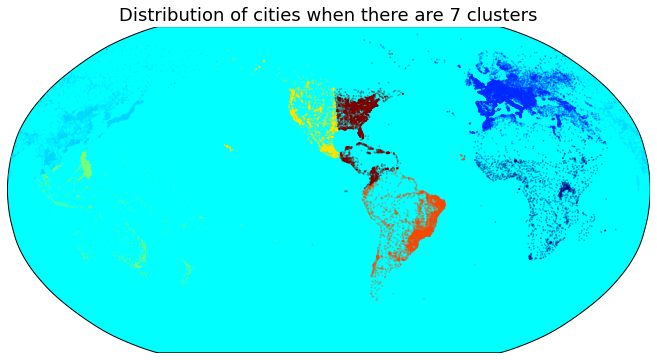

Runtime when k = 7: 5.099565820011776 sec


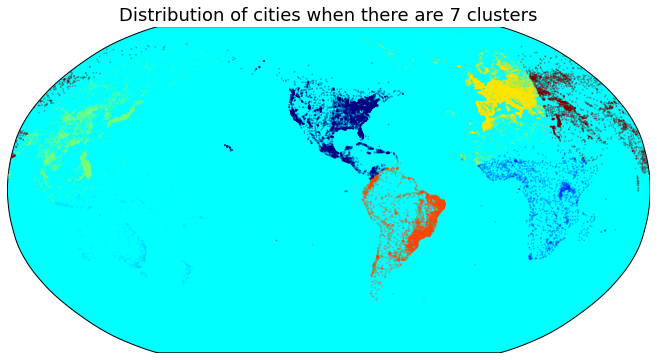

Runtime when k = 7: 19.338454078999348 sec


In [26]:
# k = 7
seven_clusters = knn_mapping(7,5)
seven_clusters

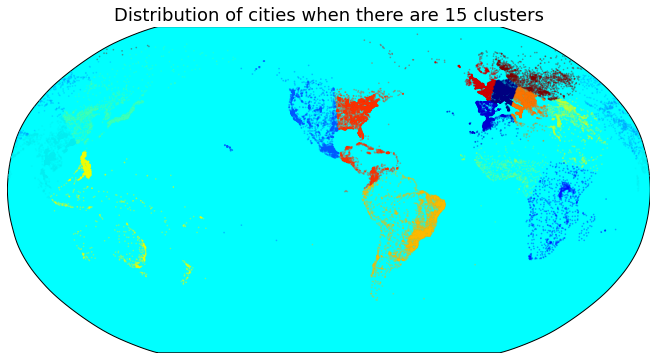

Runtime when k = 15: 29.428615548007656 sec


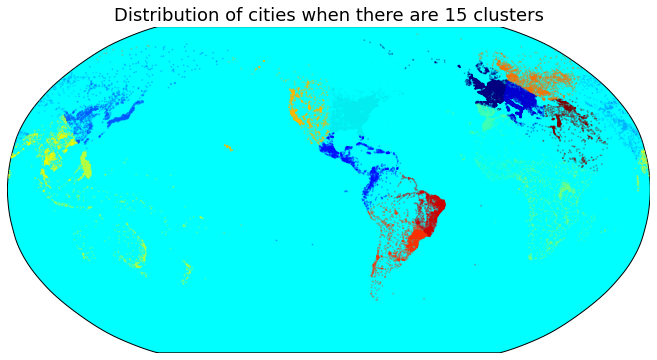

Runtime when k = 15: 38.457617429987295 sec


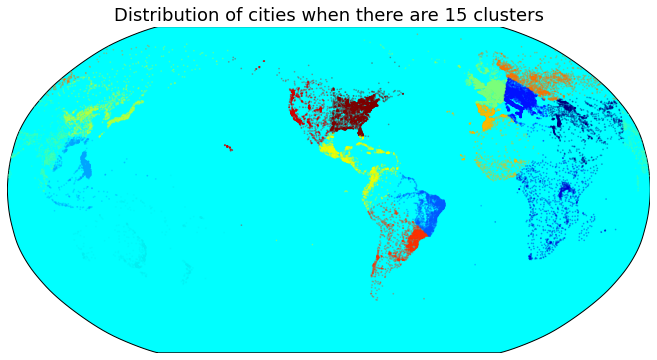

Runtime when k = 15: 36.24169126700144 sec


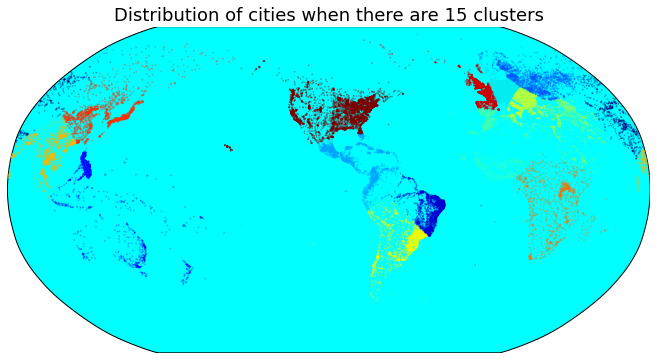

Runtime when k = 15: 36.394824101997074 sec


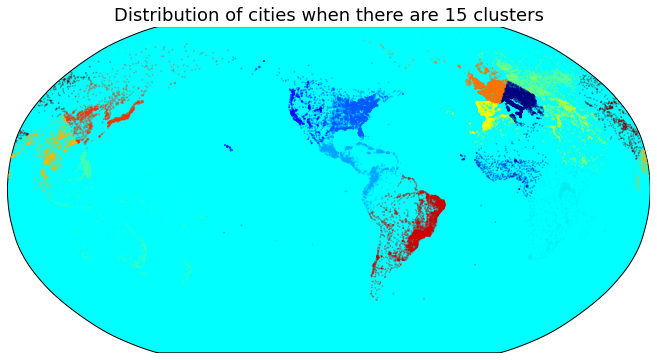

Runtime when k = 15: 24.603738386009354 sec


In [27]:
# k = 15
fifteen_clusters = knn_mapping(15,5)
fifteen_clusters